#### Importing Necessary Library

In [1]:
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
#Seeting Global seed
np.random.seed(30)
import random
random.seed(30)

#### Importing Non-Linear data

In [3]:
data = pd.read_csv('Cars_Analyzed_Data.csv')
#Shape of data
print(data.shape)

#Looking for Null values in data
print(data.isnull().sum())

#Displaying first 5 rows of data
data.head()

(392, 14)
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
car name        0
Man_Country     0
PW_ratio        0
Company_Name    0
hp_binned       0
DispCC          0
DispLitr        0
dtype: int64


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,Man_Country,PW_ratio,Company_Name,hp_binned,DispCC,DispLitr
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,USA,0.037100,chevrolet,Mid,5030.8397,5.030840
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,USA,0.044679,buick,Mid,5735.4850,5.735485
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,USA,0.043655,plymouth,Mid,5211.0978,5.211098
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,USA,0.043694,amc,Mid,4981.6784,4.981678
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,USA,0.040591,ford,Mid,4948.9042,4.948904


#### One Hot Encoding

Creating Dummies for onehotencoding

In [4]:
#dropping car name from data
data.drop('car name', axis=1, inplace=True)

In [5]:
data.drop('Company_Name', axis=1, inplace=True)

In [6]:
df = pd.get_dummies(data)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,PW_ratio,DispCC,DispLitr,Man_Country_Europe,Man_Country_Japan,Man_Country_USA,hp_binned_High,hp_binned_Low,hp_binned_Mid
0,18.0,8,307.0,130.0,3504,12.0,70,0.037100,5030.8397,5.030840,0,0,1,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0.044679,5735.4850,5.735485,0,0,1,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0.043655,5211.0978,5.211098,0,0,1,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0.043694,4981.6784,4.981678,0,0,1,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0.040591,4948.9042,4.948904,0,0,1,0,0,1


In [7]:
#Now checking shape of encoded data
df.shape

(392, 16)

#### Creating Independent and Dependent Variables

In [8]:
X = df.drop('mpg', axis=1)
Y = df[['mpg']]
print(X.shape, Y.shape)

(392, 15) (392, 1)


#### Normalizing Data

In [9]:
scaler = MinMaxScaler()
scaler.fit(X)
X_ = scaler.transform(X)
X = pd.DataFrame(data=X_, columns = X.columns)
X.head()

C:\Users\ASIFIQBAL\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,cylinders,displacement,horsepower,weight,acceleration,model year,PW_ratio,DispCC,DispLitr,Man_Country_Europe,Man_Country_Japan,Man_Country_USA,hp_binned_High,hp_binned_Low,hp_binned_Mid
0,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.316002,0.617571,0.617571,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.460762,0.728682,0.728682,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.441209,0.645995,0.645995,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.441937,0.609819,0.609819,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.382684,0.604651,0.604651,0.0,0.0,1.0,0.0,0.0,1.0


#### Splitting Dataframe

In [10]:
xtrain,xtest, ytrain, ytest = train_test_split(X, Y,test_size = 0.3, random_state=30, shuffle= True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(274, 15) (274, 1)
(118, 15) (118, 1)


## Applying Linear Regresion 

In [11]:
#importing linear Regression Library
from sklearn.linear_model import LinearRegression

In [12]:
#Defining instance of linear Regresion
lnr = LinearRegression()

In [13]:
#Training model with fit method
lnr.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
lnr_pred = lnr.predict(xtest)

In [15]:
#Intercept 
lnr.intercept_

array([37.6824553])

In [16]:
#Coefficient
lnr.coef_

array([[  0.51088651,   0.05171089,  18.0403429 , -35.81761201,
         -4.69889788,   8.31401454, -27.23908469,   0.05171089,
          0.05171089,   0.53744788,   0.73151969,  -1.26896758,
          1.85080079,  -0.52034125,  -1.33045954]])

In [17]:
#Traing score
lnr_tr = lnr.score(xtrain, ytrain)

In [18]:
#R2 Score 
lnr_r2 = r2_score(ytest, lnr_pred)
print(lnr_r2)


0.7860126253373595


In [19]:
lnr_msr = np.sqrt(mean_squared_error(ytest, lnr_pred))
print(lnr_msr)

3.6221056993791385


**Ploting Residual Plot**

In [20]:
#importing Library for residual plot
from yellowbrick.regressor import ResidualsPlot

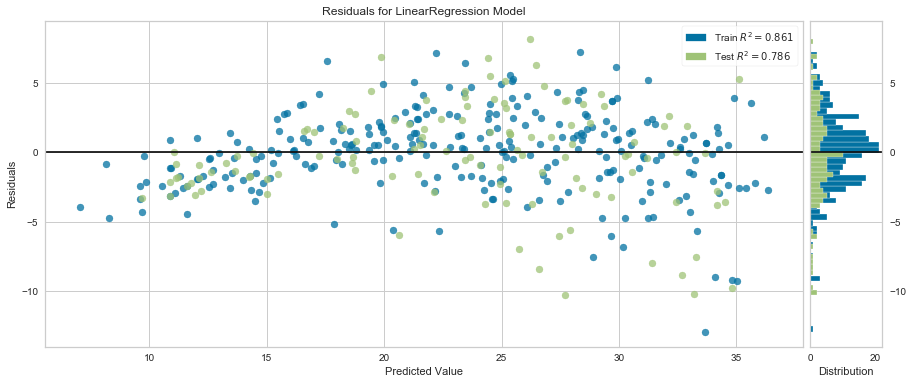

In [21]:
plt.figure(figsize=(15,6))
visualizer = ResidualsPlot(lnr)
visualizer.fit(xtrain.values, ytrain.values)  
visualizer.score(xtest.values, ytest.values) 
visualizer.poof() 

## Applying Ploynomial Regresion

In [22]:
#importing library from sklearn.preprocessing
from sklearn.preprocessing import PolynomialFeatures

In [23]:
#Defining instance of polynomial features
polynomial_features= PolynomialFeatures(degree=2)

In [24]:
#Applying ploynomial feathures to x variable and storing in x_ploy variable
x_poly = polynomial_features.fit_transform(X)

In [25]:
#Train Test Split based on x_poly
X_train ,X_test, Y_train, Y_test = train_test_split(x_poly, Y, test_size=0.3,random_state=30, shuffle=True)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(274, 136) (274, 1)
(118, 136) (118, 1)


In [26]:
#defining the instannce of linear model for ploynomial Regression
Poly_lnr = LinearRegression()

In [27]:
#Training model
Poly_lnr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
poly_train = Poly_lnr.score(X_train, Y_train)

In [29]:
poly_pred = Poly_lnr.predict(X_test)

In [30]:
Poly_lnr.intercept_

array([-1.01910924e+14])

In [31]:
poly_r2 = r2_score(Y_test,poly_pred)
print(poly_r2)

0.6466964639496604


In [32]:
poly_mse = np.sqrt(mean_squared_error(Y_test, poly_pred))
poly_mse

4.6541570753429715

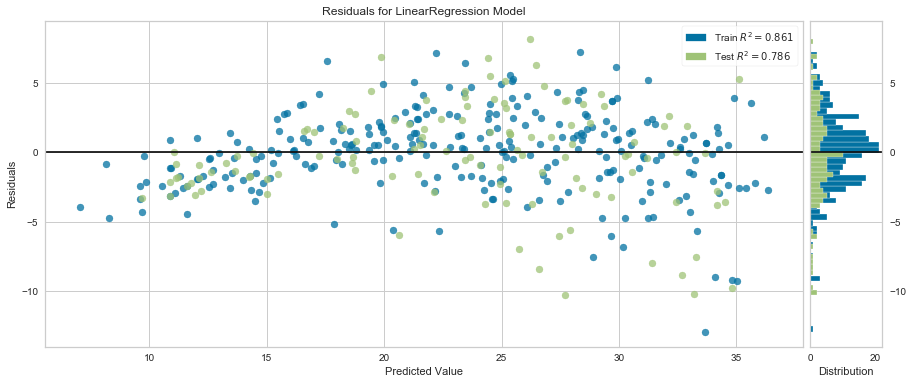

In [83]:
plt.figure(figsize=(15,6))
visualizer = ResidualsPlot(Poly_lnr)
visualizer.fit(xtrain.values, ytrain.values)  
visualizer.score(xtest.values, ytest.values) 
visualizer.poof() 

## Appyling Decision Tree

In [33]:
#Importing Library for Decision Tree
from sklearn.tree import DecisionTreeRegressor

In [34]:
#Definig Instance of Decision Tree Regressor
Rgr_dt = DecisionTreeRegressor(criterion='mse', random_state=30, max_depth=5 )

In [35]:
Rgr_dt.fit(xtrain, ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=30, splitter='best')

In [36]:
Rgdt_pred =Rgr_dt.predict(xtest)

In [37]:
Rgdt_score = Rgr_dt.score(xtrain,ytrain)
print(Rgdt_score)

0.9432940023913293


In [38]:
Rgdt_R2 = r2_score(ytest,Rgdt_pred)
print(Rgdt_R2)

0.7770686268491921


In [39]:
Rgdt_mse = np.sqrt(mean_squared_error(ytest, Rgdt_pred))
Rgdt_mse

3.6970271496919564

## Applying Random Forrest

In [40]:
# importinng Library for random Forrest
from sklearn.ensemble import RandomForestRegressor

In [41]:
rf_rgr = RandomForestRegressor(criterion='mse', max_depth=5, random_state=30)

In [42]:
rf_rgr.fit(xtrain, ytrain)

C:\Users\ASIFIQBAL\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ASIFIQBAL\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=30, verbose=0, warm_start=False)

In [43]:
rf_pred = rf_rgr.predict(xtest)

In [44]:
rf_score = rf_rgr.score(xtrain, ytrain)
print(rf_score)

0.9490408991840396


In [45]:
rf_r2 = r2_score(ytest, rf_pred)
print(rf_r2)

0.8064135367991772


In [46]:
rf_mse =np.sqrt(mean_squared_error(ytest , rf_pred))
rf_mse

3.4451214536819386

## Applying XGBoost

In [47]:
#importinng XGBoost
import xgboost as xgb

In [48]:
#defining Instance of Xgboost
Xgb_rgr = xgb.XGBRegressor(max_depth=5, seed=30, nthread=1)

In [49]:
Xgb_rgr.fit(xtrain,ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=1, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=30, silent=True, subsample=1)

In [50]:
xgb_pred = Xgb_rgr.predict(xtest)

In [51]:
xgb_score = Xgb_rgr.score(xtrain, ytrain)
print(xgb_score)

0.9956000848024649


In [52]:
xgb_R2 = r2_score(ytest, xgb_pred)
print(xgb_R2)

0.8234741759180897


In [53]:
xgb_mse = np.sqrt(mean_squared_error(ytest, xgb_pred))
xgb_mse

3.2898126646551615

#### Comparision of all Models

In [85]:
comp_dx = {'Algorithms':['Linear Regression','Polynomial Regression','Decision Tree', 'Random Forrest', 'XG Boost'],
           'Training Score':[lnr_tr,poly_train,Rgdt_score,rf_score,xgb_score],'R2 Score':[lnr_r2,poly_r2,Rgdt_R2,rf_r2,xgb_R2],
          'RMSE':[lnr_msr,poly_mse,Rgdt_mse,rf_mse,xgb_mse]}

In [86]:
com_df = pd.DataFrame(comp_dx)
com_df

,Algorithms,Training Score,R2 Score,RMSE
0,Linear Regression,0.861120,0.786013,3.622106
1,Polynomial Regression,0.923501,0.646696,4.654157
2,Decision Tree,0.943294,0.777069,3.697027
3,Random Forrest,0.949041,0.806414,3.445121
4,XG Boost,0.995600,0.823474,3.289813


## Tunning Model Random Forrest Regressor


### Feature Importance

In [56]:
features_tuple=list(zip(X.columns,rf_rgr.feature_importances_))

In [57]:
feature_imp=pd.DataFrame(features_tuple,columns=["Feature Names","Importance"])

In [58]:
feature_imp=feature_imp.sort_values("Importance",ascending=False)

Text(0.5, 1.0, 'Random Forest Classifier - Features Importance')

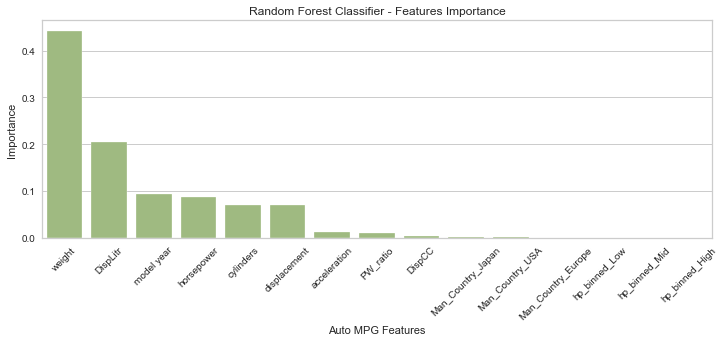

In [73]:
plt.figure(figsize=(12,4))
sns.barplot(x="Feature Names",y="Importance", data=feature_imp, color='g')
plt.xlabel("Auto MPG Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.title("Random Forest Classifier - Features Importance")

### Hyperparameter Tuning using GridSearchCV


In [60]:
#import gridserach cv
from sklearn.model_selection import GridSearchCV

In [61]:
param_grid1 = {"n_estimators" : [9, 18, 27, 36, 45, 54, 63, 72, 81, 90],
           "max_depth" : [1, 5, 10, 15, 20, 25, 30],
           "min_samples_leaf" : [1, 2, 4, 6, 8, 10]}

RF = RandomForestRegressor(random_state=30)
# Instantiate the GridSearchCV object: logreg_cv
RF_cv1 = GridSearchCV(RF, param_grid1, cv=5,scoring='r2',n_jobs=4)

# Fit it to the data
RF_cv1.fit(xtrain,ytrain)

#RF_cv1.cv_results_, 
RF_cv1.best_params_, RF_cv1.best_score_

C:\Users\ASIFIQBAL\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\ASIFIQBAL\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


({'max_depth': 5, 'min_samples_leaf': 1, 'n_estimators': 81},
 0.8864749470176739)

So we found **'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 72** as optimum parameters

In [62]:
param_grid2 = {"n_estimators" : [63,66,69,72,75,78,81],
           "max_depth" : [1,2,3,4,5,6,7,8,9,10],
           "min_samples_leaf" : [1,2,3,4]}

RF = RandomForestRegressor(random_state=30)
# Instantiate the GridSearchCV object: logreg_cv
RF_cv2 = GridSearchCV(RF, param_grid2, cv=5,scoring='r2',n_jobs=4)

# Fit it to the data
RF_cv2.fit(xtrain,ytrain)

#RF_cv2.grid_scores_, 
RF_cv2.best_params_, RF_cv2.best_score_

C:\Users\ASIFIQBAL\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\ASIFIQBAL\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


({'max_depth': 7, 'min_samples_leaf': 1, 'n_estimators': 66},
 0.8869982212049935)

So we found **'max_depth': 6, 'min_samples_leaf': 2, 'n_estimators': 66** as optimum parameters

## Tunned Random Forrest

In [63]:
RF_tuned = RF_cv2.best_estimator_

In [64]:
RF_tuned.fit(xtrain, ytrain)

C:\Users\ASIFIQBAL\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=66, n_jobs=None,
           oob_score=False, random_state=30, verbose=0, warm_start=False)

In [65]:
RF_tpred = RF_tuned.predict(xtest)

In [66]:
Rf_tscore = RF_tuned.score(xtrain,ytrain)

In [67]:
Rf_tr2 = r2_score(ytest, RF_tpred)
Rf_tr2

0.8211096402858189

In [68]:
RF_Tmse = np.sqrt(mean_squared_error(ytest, RF_tpred))

#### Comparison

In [69]:
RF_dict = {"Algorithm":["Random Forest","Random Forest"],"Action":["First Run","Tuned"],
           "Training Score":[rf_score,Rf_tscore],"R2 Score":[rf_r2,Rf_tr2], "RMSE":[rf_mse,RF_Tmse]}

In [70]:
CM =pd.DataFrame(RF_dict)

In [71]:
CM

,Algorithm,Action,Training Score,R2 Score,RMSE
0,Random Forest,First Run,0.949041,0.806414,3.445121
1,Random Forest,Tuned,0.977891,0.821110,3.311773


In [87]:
print(ytest[0:5], RF_tpred[0:5])

      mpg
359  26.6
368  24.0
126  15.0
150  19.0
217  25.5 [20.65443756 26.60073129 18.07084949 19.4975479  24.61083158]
